<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\header.png' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laborat√≥rio de Inova√ß√£o e Automa√ß√£o 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/2 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Intelig√™ncia Artificial - Prepara√ß√£o, An√°lise e Predi√ß√£o de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Projeto - An√°lise Preditiva de Pre√ßos de Im√≥veis - <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">House Prices Dataset </a> </h2>

Notebook desenvolvido por: <b>Rubens Rocha Brand√£o</b>

 <hr style="height:2px">

---
## 1. Bibliotecas Necess√°rias para o Notebook

Para este projeto, ser√£o utilizadas as seguintes bibliotecas com suas respectivas vers√µes ou superiores:

* [`matplotlib`](https://matplotlib.org/) (vers√£o 3.1.3): para a cria√ß√£o de gr√°ficos.
* [`seaborn`](https://seaborn.pydata.org/) (vers√£o 0.10.0): para visualiza√ß√µes estat√≠sticas mais elaboradas.
* [`numpy`](https://numpy.org) (vers√£o 1.16.2): para manipula√ß√£o eficiente de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (vers√£o 0.24.1): para manipula√ß√£o e an√°lise de dados em formato de tabela (DataFrame).
* [`scikit-learn`](https://scikit-learn.org/stable/) (vers√£o 1.0 ou superior): para a constru√ß√£o do modelo de Machine Learning e avalia√ß√£o de m√©tricas.

In [34]:
import numpy as np
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sns.set_style("whitegrid")

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


---
## 2. Carregar e Exibir os Dados da Fonte

O primeiro passo pr√°tico √© carregar o conjunto de dados do arquivo `train.csv` para um DataFrame do pandas. Em seguida, realizaremos uma inspe√ß√£o inicial com os m√©todos `.head()` e `.info()` para entender a estrutura, o formato dos dados e a presen√ßa de valores ausentes.

In [2]:
# Importar o arquivo e guardar em um dataframe
df = pd.read_csv('datasets/train.csv')

# Exibir as 5 primeiras linhas para entender a estrutura
print("Amostra dos dados:")
display(df.head())

# Verificar as informa√ß√µes gerais do dataframe (tipos de dados, valores n√£o nulos)
print("\nInforma√ß√µes do DataFrame:")
df.info()

# Verificar o n√∫mero de linhas e colunas
print(f"\nO dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Amostra dos dados:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


Informa√ß√µes do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

---
## 3. Pr√©-processamento

Nesta etapa, o objetivo √© realizar a limpeza e a prepara√ß√£o dos dados, minimizando ou eliminando problemas que possam impactar a qualidade da an√°lise e do modelo preditivo.

### 3.1 Sele√ß√£o de atributos (Feature Selection)

O dataset original possui 81 colunas. Para este estudo inicial, selecionamos um subconjunto de atributos num√©ricos que, por hip√≥tese, possuem maior relev√¢ncia para a predi√ß√£o do pre√ßo de venda (`SalePrice`), simplificando a an√°lise.

In [3]:
colunas_selecionadas = [
    # --- Vari√°veis Num√©ricas ---
    'OverallQual',      # Nota da qualidade geral do material e acabamento da casa (1 a 10)
    'GrLivArea',        # √Årea de estar acima do solo em p√©s quadrados
    'GarageCars',       # Tamanho da garagem em capacidade de carros
    'TotalBsmtSF',      # √Årea total do por√£o em p√©s quadrados
    'YearBuilt',        # Ano de constru√ß√£o original da casa
    'LotFrontage',      # Comprimento da fachada do lote em p√©s
    '1stFlrSF',         # √Årea do primeiro andar em p√©s quadrados
    'FullBath',         # N√∫mero de banheiros completos acima do por√£o
    'TotRmsAbvGrd',     # Total de c√¥modos acima do solo (n√£o inclui banheiros)
    
    # --- Vari√°veis Categ√≥ricas (Texto) ---
    'Neighborhood',     # Bairro da cidade de Ames onde o im√≥vel est√° localizado
    'HouseStyle',       # Estilo da moradia (ex: 1 andar, 2 andares)
    'BsmtQual',         # Avalia a altura do por√£o (Excelente, Bom, T√≠pico, Razo√°vel)
    'KitchenQual',      # Qualidade da cozinha (Excelente, Bom, T√≠pico, Razo√°vel)
    'Foundation',       # Tipo de funda√ß√£o da casa (ex: Concreto, Tijolo)
    'PavedDrive',       # Indica se a entrada da garagem √© pavimentada (Sim, Parcial, N√£o)
    
    # --- Vari√°vel Alvo ---
    'SalePrice'         # O pre√ßo de venda da propriedade em d√≥lares (o que queremos prever)
]
df_selecionado = df[colunas_selecionadas].copy()

print(f"Colunas selecionadas. O DataFrame agora tem o formato: {df_selecionado.shape}\n")
display(df_selecionado)


Colunas selecionadas. O DataFrame agora tem o formato: (1460, 16)



OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  LotFrontage  \
0               7       1710           2          856       2003         65.0   
1               6       1262           2         1262       1976         80.0   
2               7       1786           2          920       2001         68.0   
3               7       1717           3          756       1915         60.0   
4               8       2198           3         1145       2000         84.0   
...           ...        ...         ...          ...        ...          ...   
1455            6       1647           2          953       1999         62.0   
1456            6       2073           2         1542       1978         85.0   
1457            7       2340           1         1152       1941         66.0   
1458            5       1078           1         1078       1950         68.0   
1459            5       1256           1         1256       1965         75.0   

      1stFlrSF  FullBath  TotRmsAbvGrd Neighborhood HouseStyle BsmtQual  \
0          856         2             8      CollgCr     2Story       Gd   
1         1262         2             6      Veenker     1Story       Gd   
2          920         2             6      CollgCr     2Story       Gd   
3          961         1             7      Crawfor     2Story       TA   
4         1145         2             9      NoRidge     2Story       Gd   
...        ...       ...           ...          ...        ...      ...   
1455       953         2             7      Gilbert     2Story       Gd   
1456      2073         2             7       NWAmes     1Story       Gd   
1457      1188         2             9      Crawfor     2Story       TA   
1458      1078         1             5        NAmes     1Story       TA   
1459      1256         1             6      Edwards     1Story       TA   

     KitchenQual Foundation PavedDrive  SalePrice  
0             Gd      PConc          Y     208500  
1             TA     CBlock          Y     181500  
2             Gd      PConc          Y     223500  
3             Gd     BrkTil          Y     140000  
4             Gd      PConc          Y     250000  
...          ...        ...        ...        ...  
1455          TA      PConc          Y     175000  
1456          TA     CBlock          Y     210000  
1457          Gd      Stone          Y     266500  
1458          Gd     CBlock          Y     142125  
1459          TA     CBlock          Y     147500  

[1460 rows x 16 columns]

### 3.2. Tratamento de Valores Ausentes (NaN)
Ap√≥s a sele√ß√£o, verificamos e tratamos os dados faltantes. A estrat√©gia foi preencher `LotFrontage` com a mediana, `BsmtQual` com a categoria 'NA' (N√£o Aplic√°vel), e `GarageCars` e `TotalBsmtSF` com 0, assumindo que a aus√™ncia de valor representa a aus√™ncia da caracter√≠stica.

In [4]:
print("Valores ausentes ANTES do tratamento:")
print(df_selecionado.isnull().sum().sort_values(ascending=False))

mediana_lot_frontage = df_selecionado['LotFrontage'].median()
df_selecionado['LotFrontage'] = df_selecionado['LotFrontage'].fillna(mediana_lot_frontage)
df_selecionado['BsmtQual'] = df_selecionado['BsmtQual'].fillna('NA')
df_selecionado['GarageCars'] = df_selecionado['GarageCars'].fillna(0)
df_selecionado['TotalBsmtSF'] = df_selecionado['TotalBsmtSF'].fillna(0)

print("\nValores ausentes DEPOIS do tratamento:")
print(df_selecionado.isnull().sum().sort_values(ascending=False))
print("\n")

Valores ausentes ANTES do tratamento:
LotFrontage     259
BsmtQual         37
OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
YearBuilt         0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
Neighborhood      0
HouseStyle        0
KitchenQual       0
Foundation        0
PavedDrive        0
SalePrice         0
dtype: int64

Valores ausentes DEPOIS do tratamento:
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
LotFrontage     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
Neighborhood    0
HouseStyle      0
BsmtQual        0
KitchenQual     0
Foundation      0
PavedDrive      0
SalePrice       0
dtype: int64




### 3.3. Verifica√ß√£o de Dados Duplicados

Devemos verificar se existem registros (linhas) completamente duplicados. Tais registros n√£o adicionam informa√ß√£o nova ao modelo e podem ser removidos.

In [5]:
num_duplicados = df_selecionado.duplicated().sum()
print(f"N√∫mero de linhas duplicadas encontradas: {num_duplicados}")
if num_duplicados > 0:
    df_selecionado.drop_duplicates(inplace=True)
    print("Linhas duplicadas foram removidas.")
    print(f"Novo formato do DataFrame: {df_selecionado.shape}\n")
else:
    print("Nenhuma linha duplicada foi encontrada no conjunto de dados.\n")

N√∫mero de linhas duplicadas encontradas: 0
Nenhuma linha duplicada foi encontrada no conjunto de dados.



### 3.4. Encoding de Vari√°veis Categ√≥ricas
Para que o modelo de regress√£o possa processar as colunas de texto (categ√≥ricas), utilizamos a t√©cnica de **One-Hot Encoding** com a fun√ß√£o `pd.get_dummies`. Isso transforma cada categoria em uma nova coluna bin√°ria (0 ou 1)

In [6]:
print("--- Passo 3.4: Convertendo colunas de texto para n√∫meros (One-Hot Encoding) ---")
df_encoded = pd.get_dummies(df_selecionado, drop_first=True)
print(f"Formato do DataFrame ap√≥s encoding: {df_encoded.shape}")
print("Novas colunas foram criadas para representar as categorias.\n")

--- Passo 3.4: Convertendo colunas de texto para n√∫meros (One-Hot Encoding) ---
Formato do DataFrame ap√≥s encoding: (1460, 55)
Novas colunas foram criadas para representar as categorias.



### 3.5. Detec√ß√£o e Remo√ß√£o de Outliers
Identificamos e removemos outliers que poderiam distorcer os resultados do modelo linear, criando assim nosso DataFrame final e tratado.

GrLivArea: 31 outliers removidos


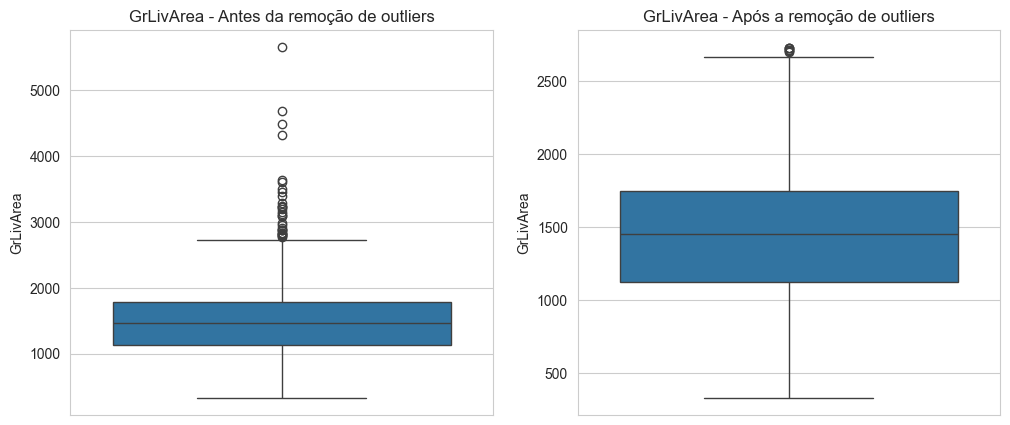

TotalBsmtSF: 62 outliers removidos


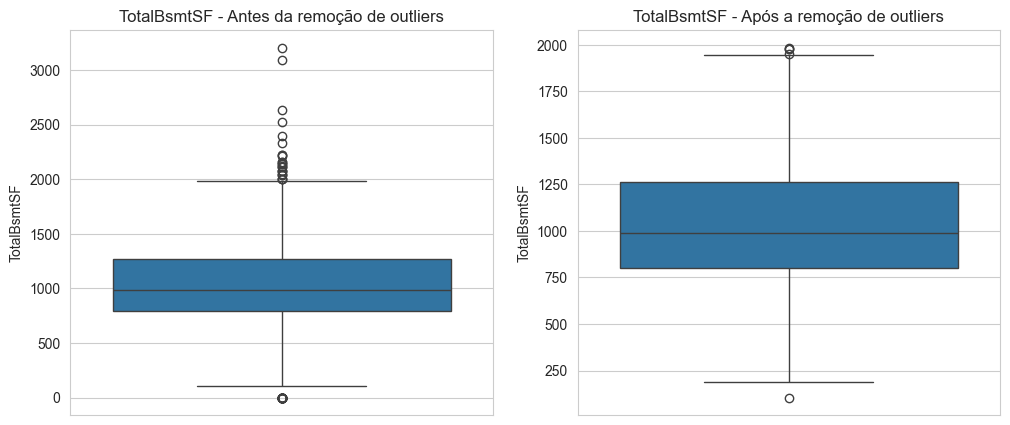

LotFrontage: 107 outliers removidos


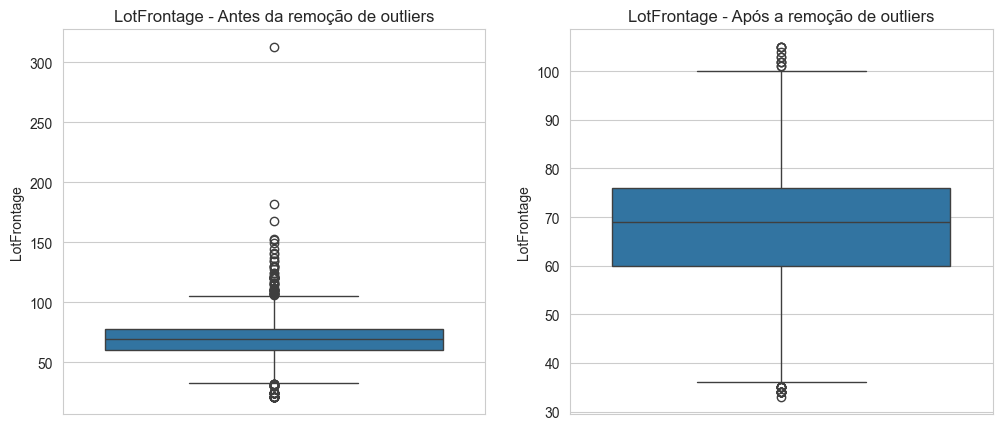

1stFlrSF: 7 outliers removidos


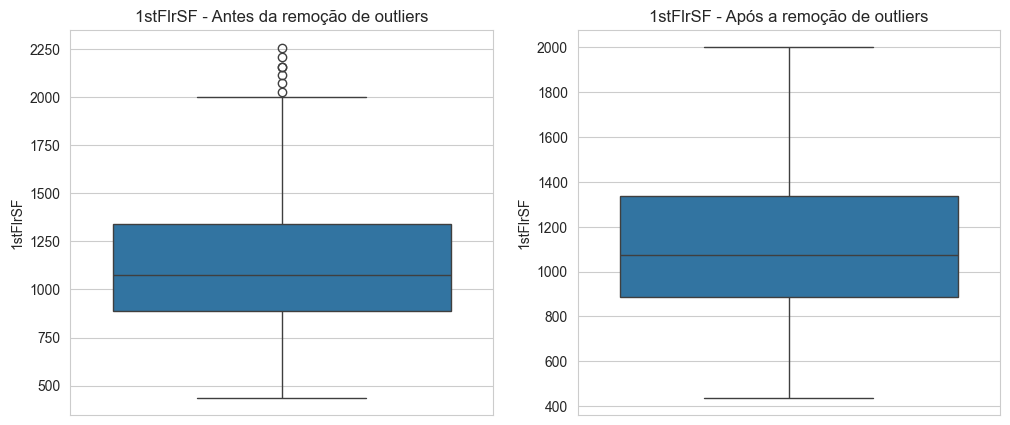

SalePrice: 41 outliers removidos


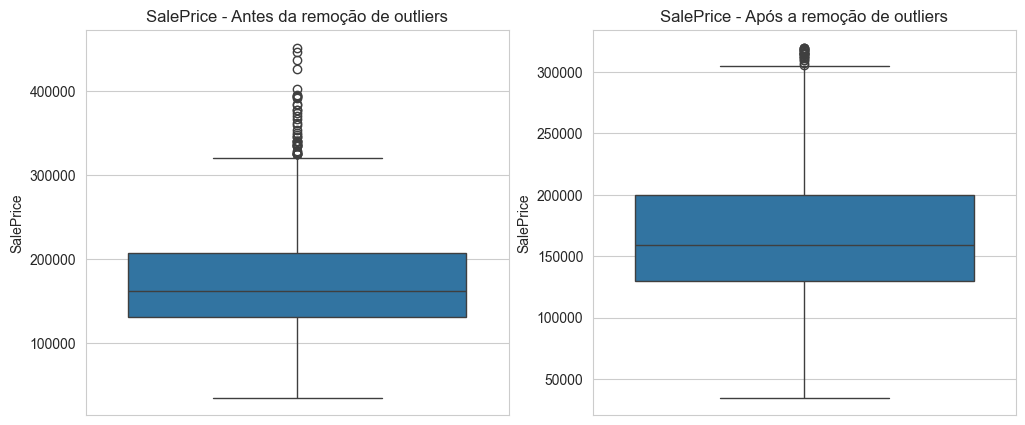

OverallQual: 0 outliers removidos (dom√≠nio)


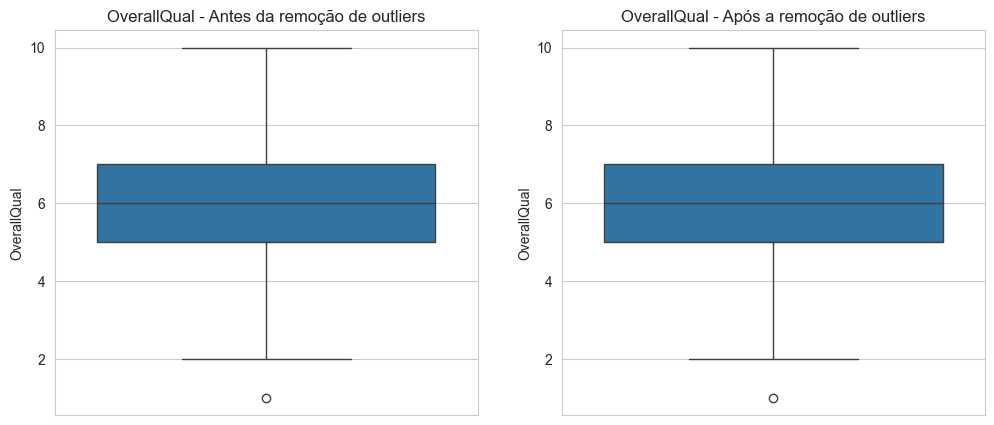

GarageCars: 0 outliers removidos (dom√≠nio)


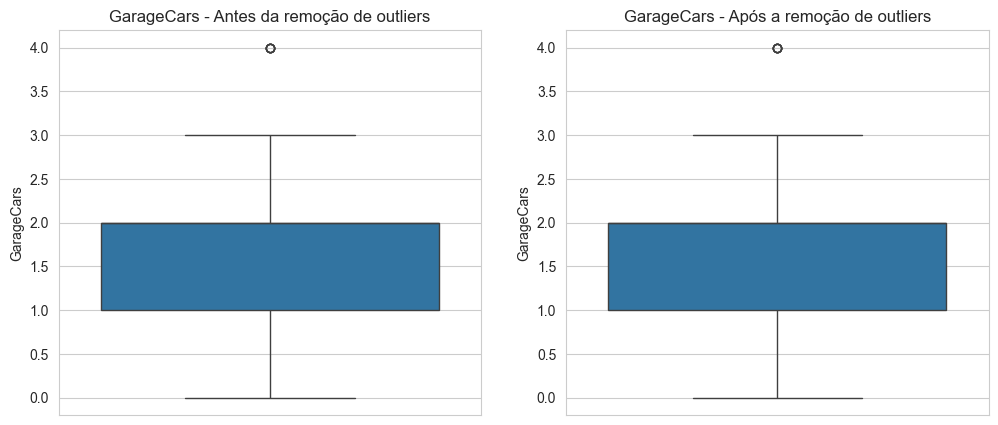

FullBath: 0 outliers removidos (dom√≠nio)


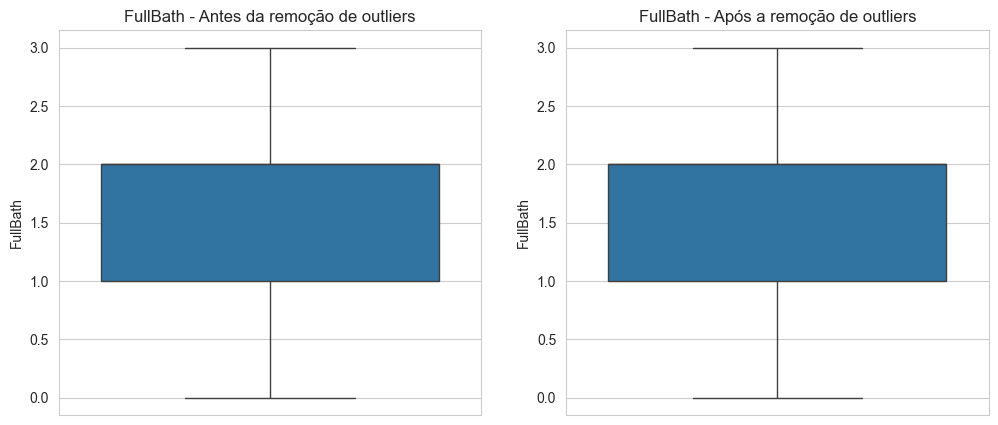

TotRmsAbvGrd: 0 outliers removidos (dom√≠nio)


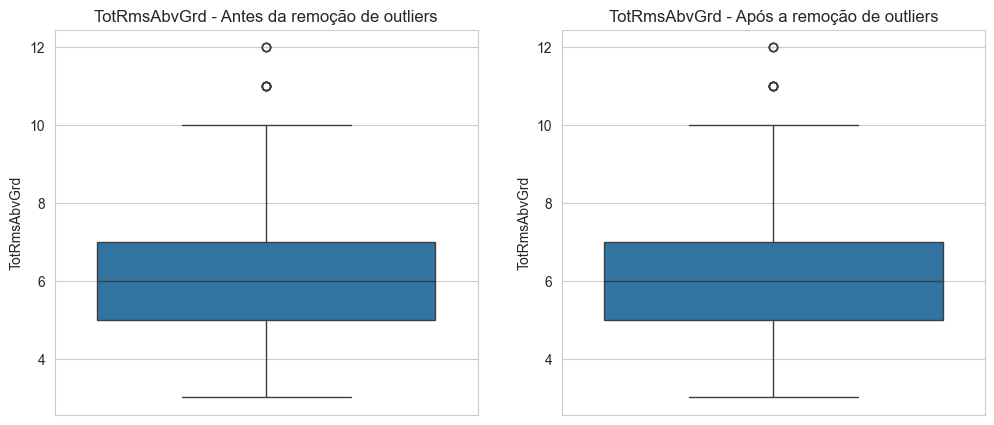


Dimens√µes finais ap√≥s remo√ß√£o de outliers: (1212, 55)


In [10]:
num_cols_iqr = ['GrLivArea', 'TotalBsmtSF', 'LotFrontage', '1stFlrSF', 'SalePrice']

domain_limits = {
    'OverallQual': (1, 10),
    'GarageCars': (0, 6),
    'FullBath': (0, 5),
    'TotRmsAbvGrd': (2, 15)
}

df_tratado = df_encoded.copy()

def plot_before_after(df_before, df_after, col):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=df_before[col])
    plt.title(f'{col} - Antes da remo√ß√£o de outliers')
    plt.subplot(1,2,2)
    sns.boxplot(y=df_after[col])
    plt.title(f'{col} - Ap√≥s a remo√ß√£o de outliers')
    plt.show()

for col in num_cols_iqr:
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df_before = df_tratado.copy()
    df_tratado = df_tratado[(df_tratado[col] >= lower) & (df_tratado[col] <= upper)]
    print(f"{col}: {df_before.shape[0] - df_tratado.shape[0]} outliers removidos")
    
    plot_before_after(df_before, df_tratado, col)

for col, (min_val, max_val) in domain_limits.items():
    df_before = df_tratado.copy()
    df_tratado = df_tratado[(df_tratado[col] >= min_val) & (df_tratado[col] <= max_val)]
    print(f"{col}: {df_before.shape[0] - df_tratado.shape[0]} outliers removidos (dom√≠nio)")
    
    plot_before_after(df_before, df_tratado, col)

print(f"\nDimens√µes finais ap√≥s remo√ß√£o de outliers: {df_tratado.shape}")

---
## 4. Descoberta de Padr√µes e Tend√™ncias </h1>
<p>
Nesta etapa, analisamos os dados limpos para identificar padr√µes, tend√™ncias e rela√ß√µes entre vari√°veis.
O foco √© entender o comportamento do pre√ßo de venda em fun√ß√£o das vari√°veis num√©ricas e categ√≥ricas.
</p>

### 4.1 Distribui√ß√£o do Pre√ßo de Venda (SalePrice)
<p>
Visualizamos a distribui√ß√£o do pre√ßo de venda antes e depois da transforma√ß√£o logar√≠tmica.
Isso ajuda a identificar skew e outliers, e prepara o target para modelagem linear.
</p>

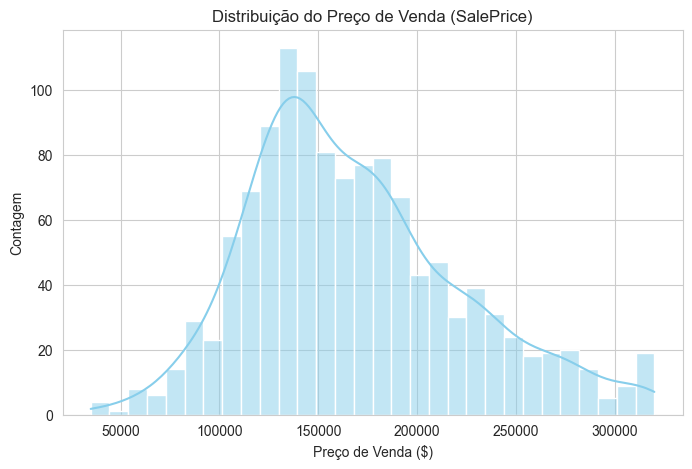

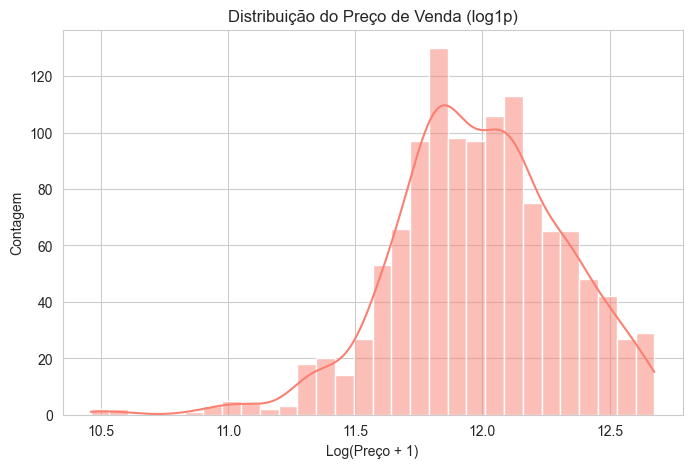

In [12]:
df_eda = df_tratado.copy()
plt.figure(figsize=(8,5))
sns.histplot(df_eda['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Distribui√ß√£o do Pre√ßo de Venda (SalePrice)")
plt.xlabel("Pre√ßo de Venda ($)")
plt.ylabel("Contagem")
plt.show()

# Log-transform para reduzir skew
import numpy as np
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_eda['SalePrice']), bins=30, kde=True, color='salmon')
plt.title("Distribui√ß√£o do Pre√ßo de Venda (log1p)")
plt.xlabel("Log(Pre√ßo + 1)")
plt.ylabel("Contagem")
plt.show()

### 4.2 Mapa de Correla√ß√£o</h2>
<p>
Identificamos as vari√°veis num√©ricas mais correlacionadas com SalePrice. 
Isso ajuda na escolha de features relevantes e na detec√ß√£o de multicolinearidade.
</p>

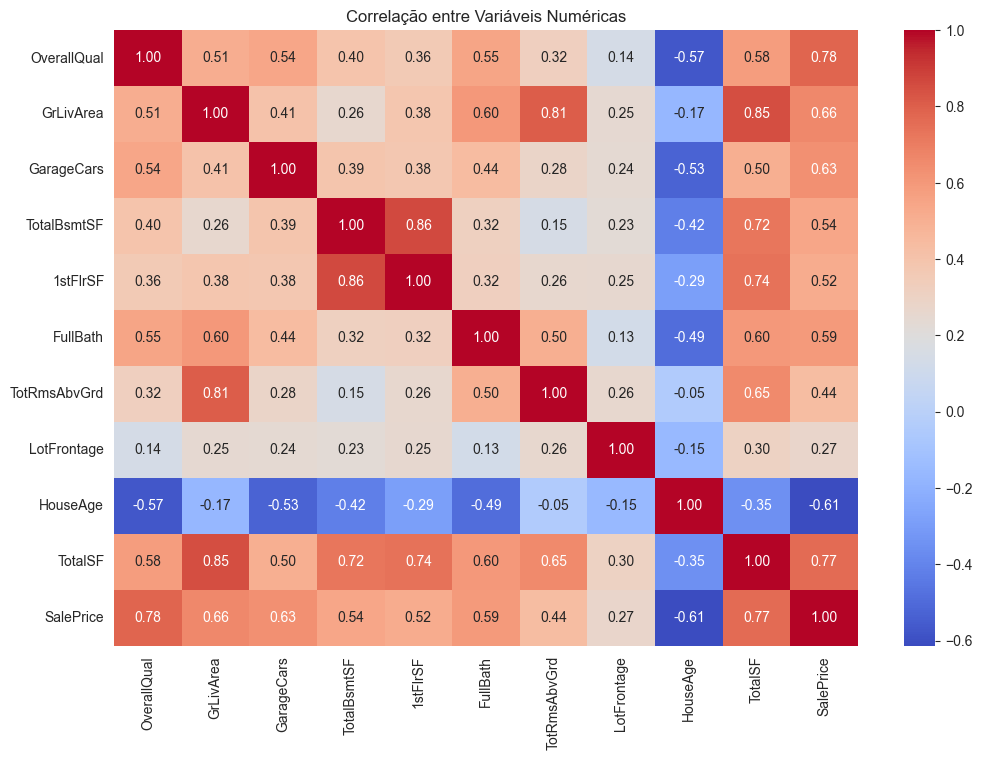

In [16]:
num_cols = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF",
            "1stFlrSF","FullBath","TotRmsAbvGrd","LotFrontage",
            "HouseAge","TotalSF","SalePrice"]

plt.figure(figsize=(12,8))
sns.heatmap(df_eda[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correla√ß√£o entre Vari√°veis Num√©ricas")
plt.show()

### 4.3 Impacto das Vari√°veis Categ√≥ricas</h2>
<p>
Usamos boxplots para visualizar como categorias afetam o pre√ßo de venda.
Isso evidencia bairros, qualidade geral e qualidade da cozinha como fatores-chave.
</p>

Formato final (com categorias e sem outliers): (1441, 16)


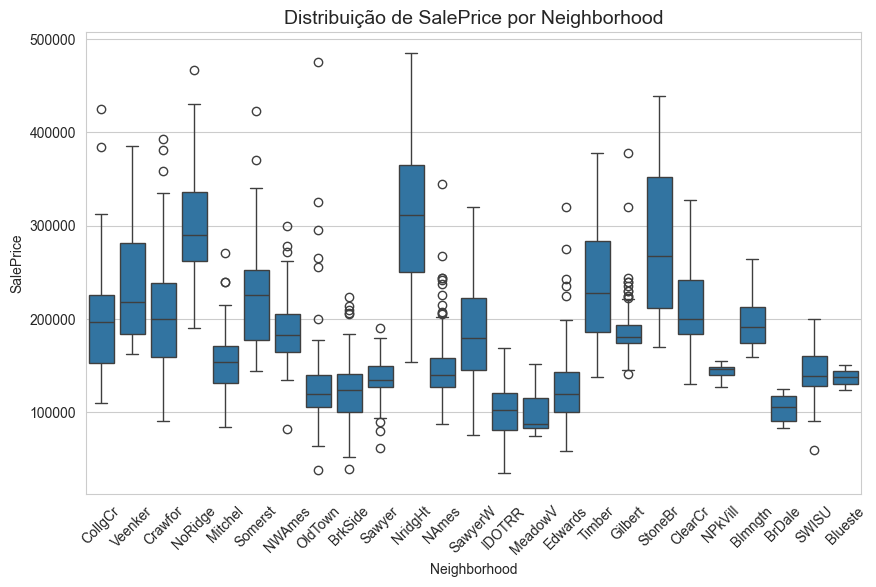

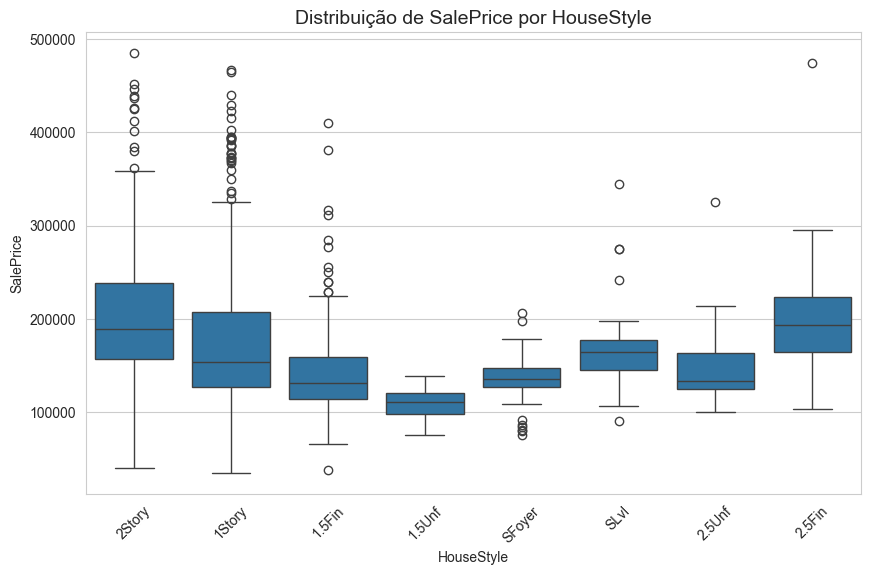

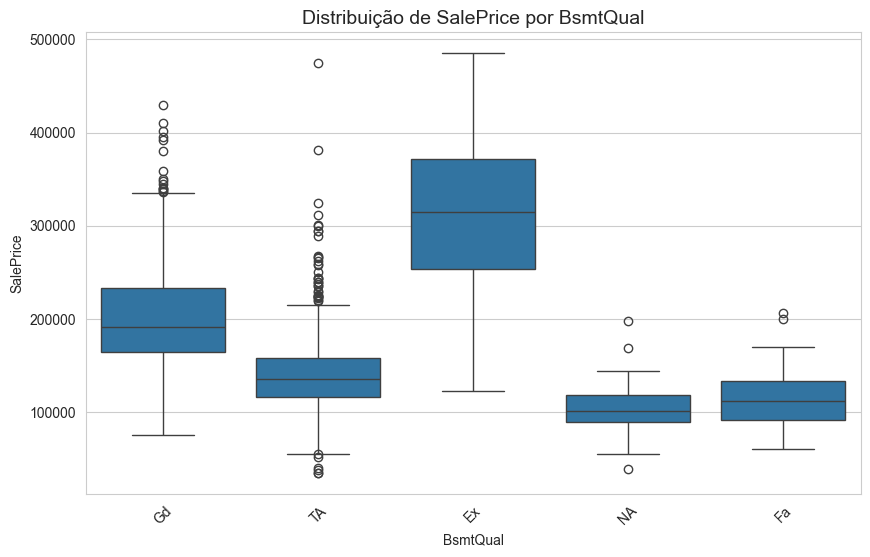

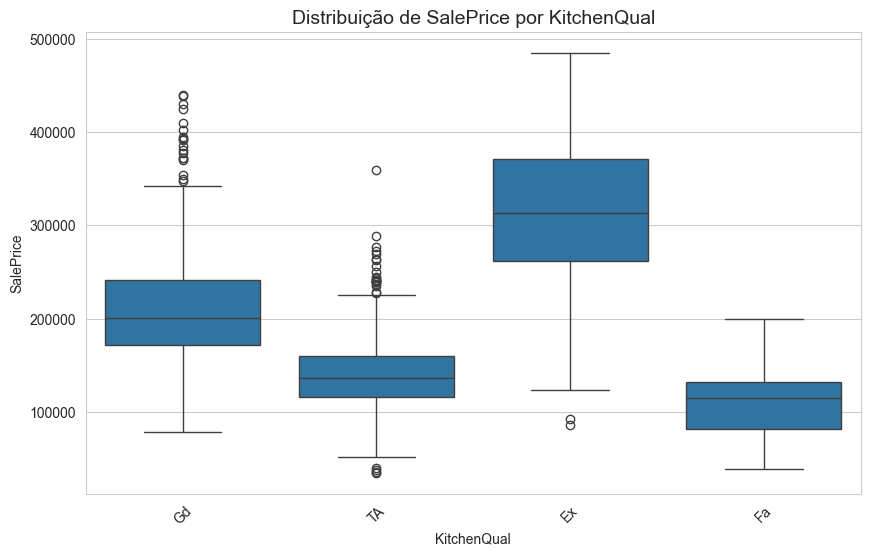

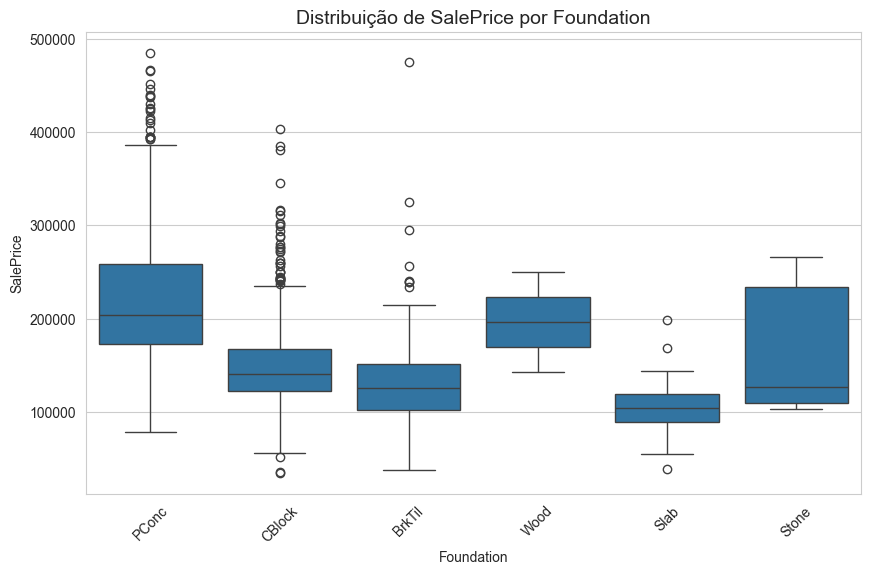

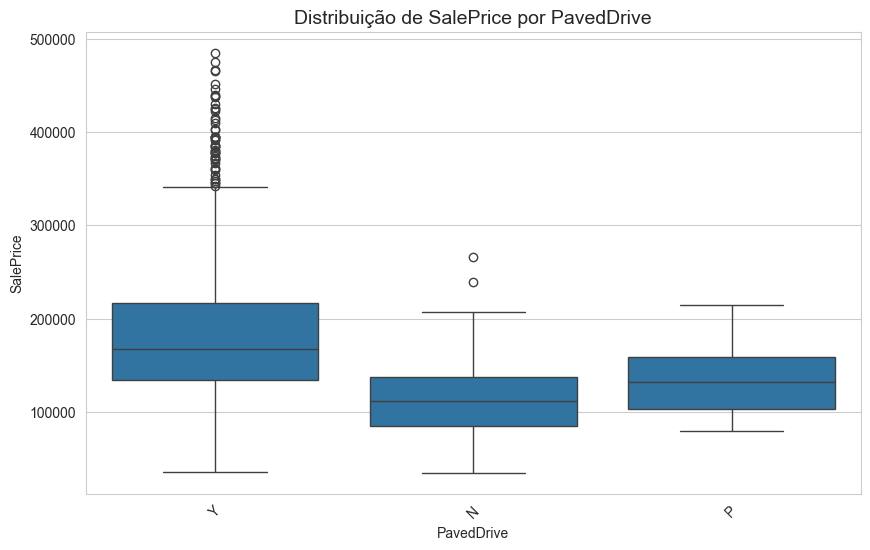

In [25]:
df_tratado_cat = df_selecionado.copy()

# Removendo os mesmos outliers usados em df_tratado
df_tratado_cat = df_tratado_cat[df_tratado_cat['GrLivArea'] < 4000].copy()
df_tratado_cat = df_tratado_cat[df_tratado_cat['SalePrice'] < 500000].copy()
df_tratado_cat = df_tratado_cat[df_tratado_cat['LotFrontage'] < 150].copy()

print(f"Formato final (com categorias e sem outliers): {df_tratado_cat.shape}")

cat_cols = df_tratado_cat.select_dtypes(include=['object']).columns  # s√≥ as categ√≥ricas

for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_tratado_cat[col], y=df_tratado_cat['SalePrice'])
    plt.title(f'Distribui√ß√£o de SalePrice por {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


### 4.4 Intera√ß√£o entre GrLivArea e OverallQual</h2>
<p>
Analisamos como a √°rea de estar (GrLivArea) e a qualidade geral (OverallQual) 
combinadas influenciam o pre√ßo de venda.
</p>

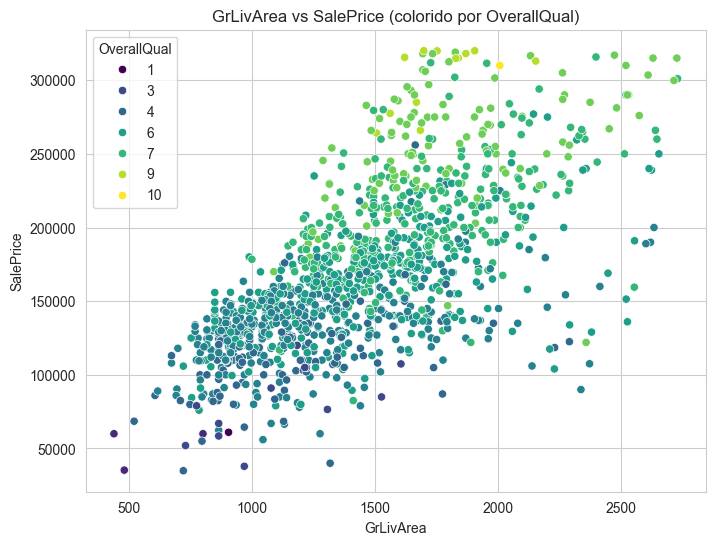

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="OverallQual", data=df_eda, palette="viridis")
plt.title("GrLivArea vs SalePrice (colorido por OverallQual)")
plt.show()

### 4.5 Tend√™ncia de Pre√ßo ao Longo do Tempo</h2>
<p>
Exploramos como o pre√ßo de venda varia de acordo com o ano de constru√ß√£o, 
destacando per√≠odos com im√≥veis mais valorizados.
</p>

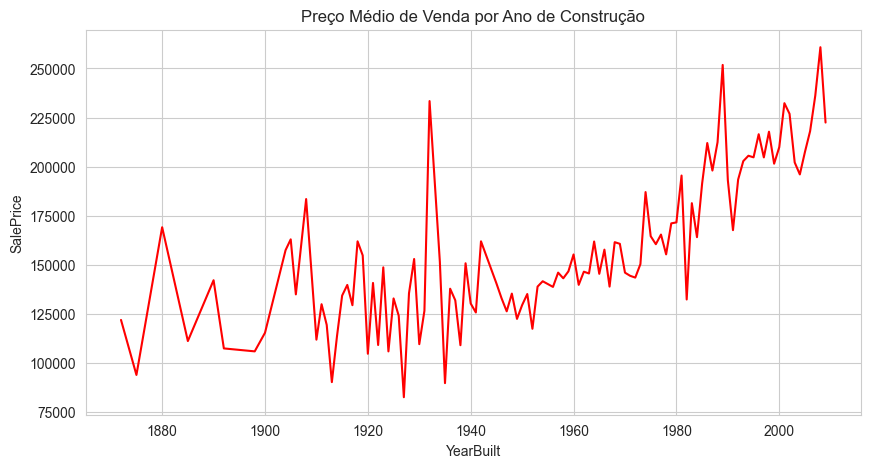

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x="YearBuilt", y="SalePrice", data=df_eda.groupby("YearBuilt", as_index=False)["SalePrice"].mean(), color="red")
plt.title("Pre√ßo M√©dio de Venda por Ano de Constru√ß√£o")
plt.show()

---
## 5. Modelagem Preditiva</h1>
<p>
Nesta etapa, utilizamos os dados tratados e explorados para treinar modelos de regress√£o 
e prever o pre√ßo de venda (SalePrice). 
Comparamos diferentes algoritmos e avaliamos desempenho com m√©tricas adequadas.
</p>

### 5.1 Prepara√ß√£o dos Dados</h2>
<p>
Prepara√ß√£o do dataset: c√≥pia dos dados tratados, aplica√ß√£o de One-Hot Encoding nas vari√°veis categ√≥ricas, separa√ß√£o de features e target, divis√£o em treino/teste e escalonamento para Linear Regression.
</p>

In [31]:
df_modelo = df_tratado.copy()  # DataFrame j√° tratado (outliers removidos)
df_modelo = pd.get_dummies(df_modelo, drop_first=True)  # One-Hot Encoding

X = df_modelo.drop("SalePrice", axis=1)
y = np.log1p(df_modelo["SalePrice"])  # log-transform

# Divis√£o treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar vari√°veis num√©ricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("‚úÖ Dados preparados para modelagem")

‚úÖ Dados preparados para modelagem


### 5.2 Regress√£o Linear
<p>Treinamento do modelo de Regress√£o Linear, previs√£o no conjunto de teste e c√°lculo das m√©tricas RMSE e R¬≤.</p>

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> RMSE: {rmse_lr:.2f}, R¬≤: {r2_lr:.2f}")

Linear Regression -> RMSE: 0.15, R¬≤: 0.82


### 5.3 Random Forest Regressor
Treinamento do modelo de Random Forest Regressor, previs√£o no conjunto de teste e c√°lculo das m√©tricas RMSE e R¬≤.</p>

In [35]:
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42
)
rf_model.fit(X_train, y_train)  # RF n√£o precisa de escala

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> RMSE: {rmse_rf:.2f}, R¬≤: {r2_rf:.2f}")

Random Forest -> RMSE: 0.16, R¬≤: 0.80


### 5.4 Import√¢ncia das Features (Random Forest)
<p>An√°lise das 15 vari√°veis mais importantes para o modelo de Random Forest, com gr√°fico de barras para visualiza√ß√£o.</p>

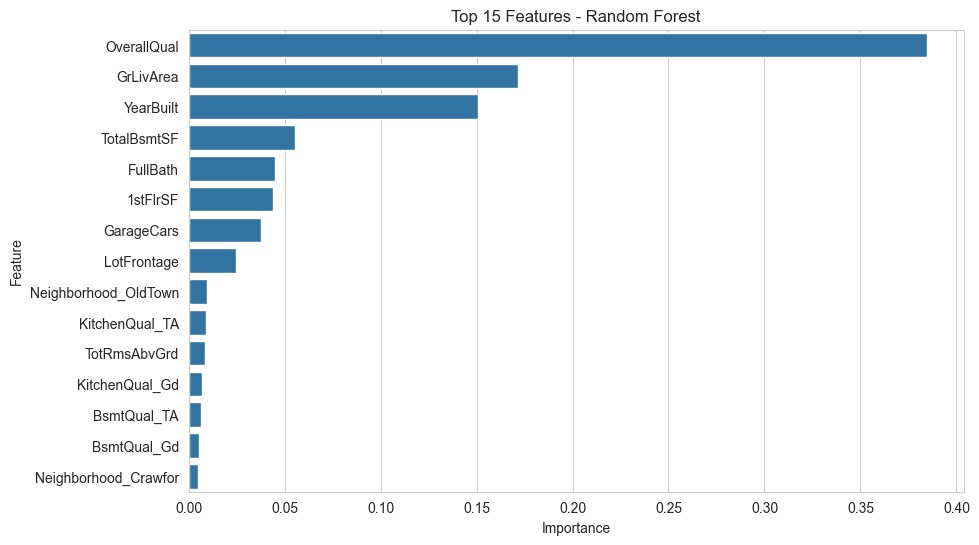

In [36]:
importances = rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 15 Features - Random Forest")
plt.show()

### 5.5 Previs√£o em Novas Casas
<p>Cria√ß√£o de novas amostras de casas, preenchimento autom√°tico das colunas dummy, aplica√ß√£o da escala e previs√£o dos pre√ßos pelos modelos treinados (Linear Regression e Random Forest).</p>

In [76]:
import pandas as pd
import numpy as np

# Exemplo de novas casas
novas_casas = [
    {'OverallQual': 9, 'GrLivArea': 2500, 'GarageCars': 2, 'TotalBsmtSF': 1500, '1stFlrSF': 1200, 'FullBath': 2, 'TotRmsAbvGrd': 7, 'Neighborhood_NridgHt':1},
    {'OverallQual': 6, 'GrLivArea': 1400, 'GarageCars': 1, 'TotalBsmtSF': 900, '1stFlrSF': 900, 'FullBath': 1, 'TotRmsAbvGrd': 5, 'Neighborhood_OldTown':1},
    {'OverallQual': 7, 'GrLivArea': 1800, 'GarageCars': 2, 'TotalBsmtSF': 1100, '1stFlrSF': 1100, 'FullBath': 2, 'TotRmsAbvGrd': 6}  # menos informa√ß√µes
]

def prever_varias_casas(lista_casas):
    resultados = []

    for casa in lista_casas:
        nova_casa = pd.DataFrame([casa])

        
        for col in X.columns:
            if col not in nova_casa.columns:
                nova_casa[col] = 0
        nova_casa = nova_casa[X.columns]  

        # üîπ Limitar valores num√©ricos √† faixa do treino
        num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']
        for col in num_cols:
            min_val = X_train[col].min()
            max_val = X_train[col].max()
            nova_casa[col] = nova_casa[col].clip(lower=min_val, upper=max_val)

        # üîπ Linear Regression: escalar colunas num√©ricas
        nova_casa_scaled = scaler.transform(nova_casa)

        # üîπ Previs√£o Linear Regression
        preco_pred_lr = np.expm1(lr_model.predict(nova_casa_scaled))

        # üîπ Previs√£o Random Forest
        preco_pred_rf = np.expm1(rf_model.predict(nova_casa))

        # üîπ Adicionar previs√µes ao DataFrame
        nova_casa['Preco_LR'] = preco_pred_lr
        nova_casa['Preco_RF'] = preco_pred_rf

        # üîπ Formatar pre√ßos em d√≥lar
        nova_casa['Preco_LR'] = nova_casa['Preco_LR'].apply(lambda x: f"${x:,.2f}")
        nova_casa['Preco_RF'] = nova_casa['Preco_RF'].apply(lambda x: f"${x:,.2f}")

        resultados.append(nova_casa)

    df_resultados = pd.concat(resultados, ignore_index=True)
    return df_resultados

# ------------------------------
# Prever todas as casas
# ------------------------------
df_previsoes = prever_varias_casas(novas_casas)

# ------------------------------
# Mostrar resultados principais
# ------------------------------
display(df_previsoes[['OverallQual','GrLivArea','GarageCars','Preco_LR','Preco_RF']])

OverallQual  GrLivArea  GarageCars    Preco_LR     Preco_RF
0            9       2500           2  $10,345.24  $253,874.75
1            6       1400           1   $5,242.94  $122,606.69
2            7       1800           2   $6,488.18  $185,131.90

### Conclus√£o:
Foram utilizadas Regress√£o Linear e Random Forest para prever os pre√ßos das casas. A regress√£o linear modela os pre√ßos assumindo uma rela√ß√£o linear entre as vari√°veis, o que pode subestimar valores quando h√° efeitos n√£o lineares ou intera√ß√µes complexas. J√° o Random Forest combina m√∫ltiplas √°rvores de decis√£o, capturando rela√ß√µes n√£o lineares e intera√ß√µes entre vari√°veis, resultando em previs√µes mais realistas, como p√¥de ser observado na previs√£o dos pre√ßos das tr√™s casas dadas no t√≥pico 5.5